<a href="https://colab.research.google.com/github/Lavanya-INFO5731-Fall2024/Lavanya_INFO5731_Fall2024/blob/main/Nidamanuri_Lavanya_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Load training and test data
train_file_path = '/content/stsa-train.txt'
test_file_path = '/content/stsa-test.txt'

# Manually load the text data into lists
with open(train_file_path, 'r') as file:
    train_data = [line.strip().split(' ', 1) for line in file]
with open(test_file_path, 'r') as file:
    test_data = [line.strip().split(' ', 1) for line in file]

# Convert lists to DataFrame for easier processing
train_df = pd.DataFrame(train_data, columns=['label', 'text'])
test_df = pd.DataFrame(test_data, columns=['label', 'text'])

# Ensure label column is of integer type
train_df['label'] = train_df['label'].astype(int)
test_df['label'] = test_df['label'].astype(int)

# Display a preview of the datasets
print(train_df.head())
print(test_df.head())

# Split train data into training and validation sets (80% train, 20% validation)
X_full_train = train_df['text']
y_full_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=42, stratify=y_full_train)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Define classification models
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

# Perform cross-validation on each model using Stratified K-Fold
model_scores = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in classifiers.items():
    # Define pipeline for vectorizing and classifying
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('clf', model)
    ])

    # Compute cross-validation scores
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    model_scores[model_name] = cv_results.mean()
    print(f"{model_name} - Cross-Validation Accuracy: {cv_results.mean():.4f}")

# Validation phase - train each model and evaluate on the validation set
print("\nValidation Results:")
for model_name, model in classifiers.items():
    pipeline = Pipeline([
        ('tfidf', tfidf),
        ('clf', model)
    ])

    # Train model and predict on validation set
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    # Calculate and display evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation Precision: {precision:.4f}")
    print(f"Validation Recall: {recall:.4f}")
    print(f"Validation F1 Score: {f1:.4f}")

# Select the model with the highest cross-validation accuracy for testing
top_model_name = max(model_scores, key=model_scores.get)
top_model = classifiers[top_model_name]
final_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', top_model)
])


   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .
Naive Bayes - Cross-Validation Accuracy: 0.7684
Support Vector Machine - Cross-Validation Accuracy: 0.7552
K-Nearest Neighbors - Cross-Validation Accuracy: 0.5116
Decision Tree - Cross-Validation Accuracy: 0.6537
Random Forest - Cross-Validation Accuracy: 0.7151


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Cross-Validation Accuracy: 0.6861

Validation Results:

Model: Naive Bayes
Validation Accuracy: 0.7587
Validation Precision: 0.7419
Validation Recall: 0.8241
Validation F1 Score: 0.7808

Model: Support Vector Machine
Validation Accuracy: 0.7558
Validation Precision: 0.7567
Validation Recall: 0.7839
Validation F1 Score: 0.7701

Model: K-Nearest Neighbors
Validation Accuracy: 0.5275
Validation Precision: 0.5596
Validation Recall: 0.4418
Validation F1 Score: 0.4938

Model: Decision Tree
Validation Accuracy: 0.6156
Validation Precision: 0.6369
Validation Recall: 0.6122
Validation F1 Score: 0.6243

Model: Random Forest
Validation Accuracy: 0.7030
Validation Precision: 0.7169
Validation Recall: 0.7119
Validation F1 Score: 0.7144


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Validation Accuracy: 0.6712
Validation Precision: 0.6551
Validation Recall: 0.7812
Validation F1 Score: 0.7126


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

K-means Silhouette Score: 0.040512292116274426
DBSCAN Silhouette Score: 0.18520553362789438
Hierarchical Clustering Silhouette Score: 0.028340375844785697
Word2Vec K-means Silhouette Score: 0.5050027635991965


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT K-means Silhouette Score: 0.10397091507911682


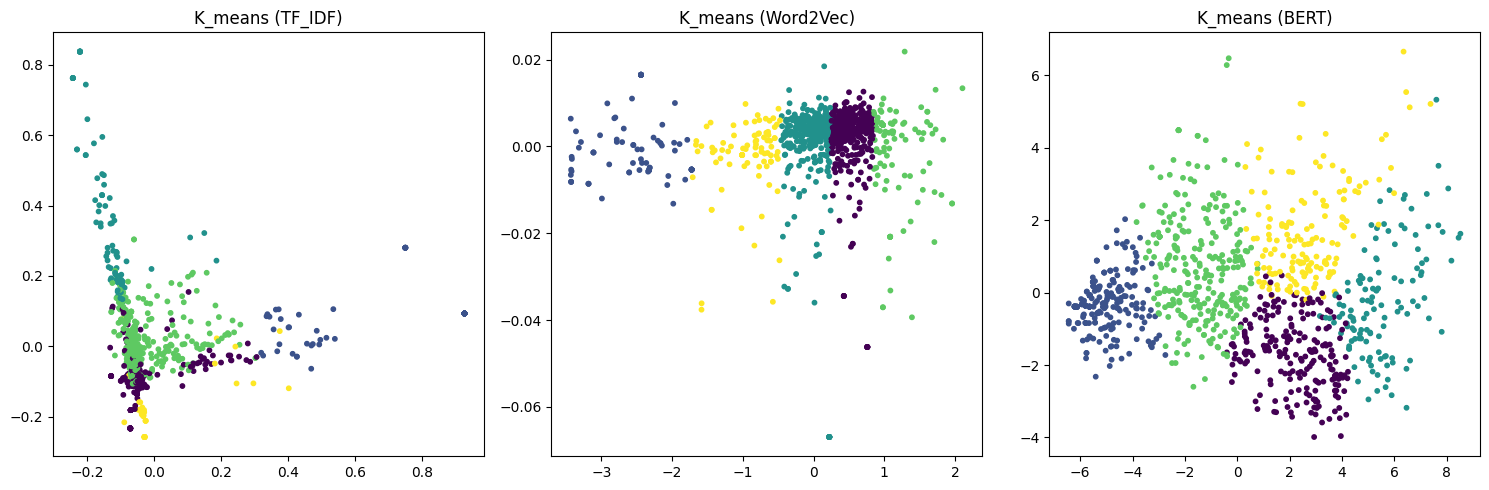

In [ ]:
import pandas as pand
import numpy as num
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plts

# Function to load and clean data in chunks
def load_and_clean_data(file_path, column_name, chunksize=10000):
    data_segments = []
    try:
        for chunk in pand.read_csv(file_path, usecols=[column_name], chunksize=chunksize, on_bad_lines='skip', engine='python'):
            clean_chunk = chunk.dropna(subset=[column_name])
            data_segments.append(clean_chunk)
    except Exception as e:
        print(f"Error reading file: {e}")
    return pand.concat(data_segments, ignore_index=True)

# Function for silhouette calculation and clustering
def perform_clustering(data, method, **kwargs):
    cluster_model = method(**kwargs)
    label = cluster_model.fit_predict(data)
    valid_labels = label != -1
    silhouette = silhouette_score(data[valid_labels], label[valid_labels]) if num.any(valid_labels) else -1
    return label, silhouette

# Load and preprocess the dataset
file_path = 'Amazon_Unlocked_Mobile.csv'
dat = load_and_clean_data(file_path, 'Reviews')
dat = dat.sample(n=1000, random_state=42)  # Randomly sample for efficiency

# Text preprocessing
dat['CleanedReviews'] = dat['Reviews'].str.lower().str.replace('[^a-zA-Z]', ' ', regex=True)

# Generate TF-IDF matrix
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(dat['CleanedReviews'])

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_label = kmeans.fit_predict(tf_idf_matrix)
kmeansSilhouette = silhouette_score(tf_idf_matrix, kmeans_label)
print(f"K-means Silhouette Score: {kmeansSilhouette}")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(tf_idf_matrix)
validLabel = dbscan_labels != -1
dbscan_silhouette = silhouette_score(tf_idf_matrix[validLabel], dbscan_labels[validLabel]) if num.any(validLabel) else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Hierarchical clustering
non_zero_indices = tf_idf_matrix.toarray().sum(axis=1) != 0
filtered_tfidf = tf_idf_matrix[non_zero_indices]
hierarchical_labels, hierarchical_silhouette = perform_clustering(
    filtered_tfidf.toarray(),
    AgglomerativeClustering,
    n_clusters=5,
    metric='cosine',
    linkage='average'
)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# Word2Vec embedding and clustering
tokenizedReviews = dat['CleanedReviews'].str.split()
word2vec_model = Word2Vec(sentences=tokenizedReviews, vector_size=100, window=5, min_count=1, workers=4)

def computeSentence_Embedding(sentence, model):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    return num.mean(vectors, axis=0) if vectors else num.zeros(model.vector_size)

word2vec_embedding = num.array([computeSentence_Embedding(review, word2vec_model) for review in dat['CleanedReviews']])
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
word2vec_labels = kmeans_word2vec.fit_predict(word2vec_embedding)
word2vec_silhouette = silhouette_score(word2vec_embedding, word2vec_labels)
print(f"Word2Vec K-means Silhouette Score: {word2vec_silhouette}")

# BERT embedding and clustering
bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bertModel = BertModel.from_pretrained('bert-base-uncased')

def computeBert_embeddings(sentences, tokenizer, model, max_length=128):
    inputs, masks = [], []
    for text in sentences:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        inputs.append(encoded['input_ids'])
        masks.append(encoded['attention_mask'])
    inputs = torch.cat(inputs, dim=0)
    masks = torch.cat(masks, dim=0)
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    return outputs.last_hidden_state[:, 0, :].numpy()

bert_Embedding = computeBert_embeddings(dat['CleanedReviews'], bertTokenizer, bertModel)
kmeans_Bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_Bert.fit_predict(bert_Embedding)
bert_silhouette = silhouette_score(bert_Embedding, bert_labels)
print(f"BERT K-means Silhouette Score: {bert_silhouette}")

# Visualization using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tf_idf_matrix.toarray())
word2vec2d = pca.fit_transform(word2vec_embedding)
bert2d = pca.fit_transform(bert_Embedding)

plts.figure(figsize=(15, 5))
plts.subplot(1, 3, 1)
plts.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=kmeans_label, cmap='viridis', s=10)
plts.title("K_means (TF_IDF)")

plts.subplot(1, 3, 2)
plts.scatter(word2vec2d[:, 0], word2vec2d[:, 1], c=word2vec_labels, cmap='viridis', s=10)
plts.title("K_means (Word2Vec)")

plts.subplot(1, 3, 3)
plts.scatter(bert2d[:, 0], bert2d[:, 1], c=bert_labels, cmap='viridis', s=10)
plts.title("K_means (BERT)")

plts.tight_layout()
plts.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

**K-means Clustering:**

Works well with TF-IDF and Word2Vec embeddings.
Groups similar reviews into a predefined number of clusters.
Performs effectively on balanced, spherical clusters.
May struggle with noise and complex data patterns.

**DBSCAN Clustering:**

Can identify clusters of varying sizes and shapes, making it useful for arbitrary cluster detection in TF-IDF embeddings.
Handles density-based clustering well, especially for non-linear clusters.
Can struggle with high-dimensional sparse data, often labeling many points as noise.

**Hierarchical Clustering:**

Offers a hierarchical structure, which allows exploration of clusters at different levels of granularity.
Computationally intensive on large datasets.

**Word2Vec Embeddings with K-means:**

Captures semantic similarities between words, enhancing clustering when used with K-means.
Context may be lost when averaging word vectors.

**BERT Embeddings with K-means:**

BERT’s contextual word representations capture subtle meanings in reviews, leading to more nuanced clusters.
Pairs effectively with K-means for sophisticated clustering outcomes.

**Overall Comparisons:**

K-means and hierarchical methods perform well with well-defined clusters.
BERT and Word2Vec embeddings improve clustering by capturing semantic relationships.
DBSCAN is advantageous for identifying clusters with irregular shapes and densities.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
This project included a thorough examination of several embedding and clustering strategies, each with special advantages for particular data properties.
My comprehension of how techniques like K-means, DBSCAN, and hierarchical clustering react to various data densities and shapes
has improved as a result of the exercises. Working with Word2Vec, BERT, and TF-IDF embeddings highlighted how crucial it is to
choose the appropriate representation depending on the requirements of the dataset.
Word2Vec recorded semantic links, BERT supplied nuanced, context-rich representations, and TF-IDF emphasized word importance in the reviews,
demonstrating how embeddings affect clustering results. The importance of experimenting when working with real-world text data was
further highlighted by applying multiple clustering approaches and visualizations, as each method showed differing strengths with various
cluster types.
All things considered, the task demonstrated the importance of choosing a clustering method according to the characteristics of the data
and the influence of embedding decisions on the quality of the clustering. Additionally, this practical experience strengthened skills
that are essential for text analysis tasks, such as analyzing and understanding clustering results.

'''